In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/geo-sim/part-00000') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"])
result_user = pd.read_json(data["result_user"])

In [23]:
result_act

,ActivateionExposure,ActivateionExposure_m1,ActivateionExposure_m2,ActivateionExposure_m3,ActivateionExposure_m4,UserExposure,UserExposure_m1,UserExposure_m2,UserExposure_m3,UserExposure_m4,...,userUsageEntorpy,userUsageEntorpy_m1,userUsageEntorpy_m2,userUsageEntorpy_m3,userUsageEntorpy_m4,userusagedominance,userusagedominance_m1,userusagedominance_m2,userusagedominance_m3,userusagedominance_m4
0,2,1,2,2,2,2,1,2,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1,2,3,2,2,1,2,2,2,...,0.693147,0.693147,0.693147,0.000000,0.000000,0.500000,0.500000,0.500000,1.000000,1.000000
2,1,1,2,4,2,1,1,2,2,2,...,1.098612,1.098612,1.098612,0.000000,0.000000,0.333333,0.333333,0.333333,1.000000,1.000000
3,4,1,4,5,4,4,1,4,2,3,...,1.386294,1.386294,1.386294,0.000000,0.000000,0.250000,0.250000,0.250000,1.000000,1.000000
4,2,1,3,6,1,2,1,3,2,1,...,1.332179,1.609438,1.609438,0.000000,0.562335,0.400000,0.200000,0.200000,1.000000,0.750000
5,5,1,3,7,5,5,1,3,2,3,...,1.560710,1.791759,1.791759,0.000000,0.562335,0.333333,0.166667,0.166667,1.000000,0.750000
6,2,1,5,8,2,2,1,5,2,2,...,1.747868,1.945910,1.945910,0.000000,0.673012,0.285714,0.142857,0.142857,1.000000,0.600000
7,3,1,5,9,2,3,1,5,2,2,...,1.906155,2.079442,2.079442,0.000000,0.693147,0.250000,0.125000,0.125000,1.000000,0.500000
8,9,1,3,10,5,9,1,3,2,3,...,2.043192,2.197225,2.197225,0.000000,0.682908,0.222222,0.111111,0.111111,1.000000,0.571429
9,5,2,3,11,2,5,2,3,2,2,...,1.973001,2.302585,2.302585,0.000000,0.661563,0.300000,0.100000,0.100000,1.000000,0.625000


/Users/danielkershaw/Virtualenvs/iPython/lib/python3.5/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


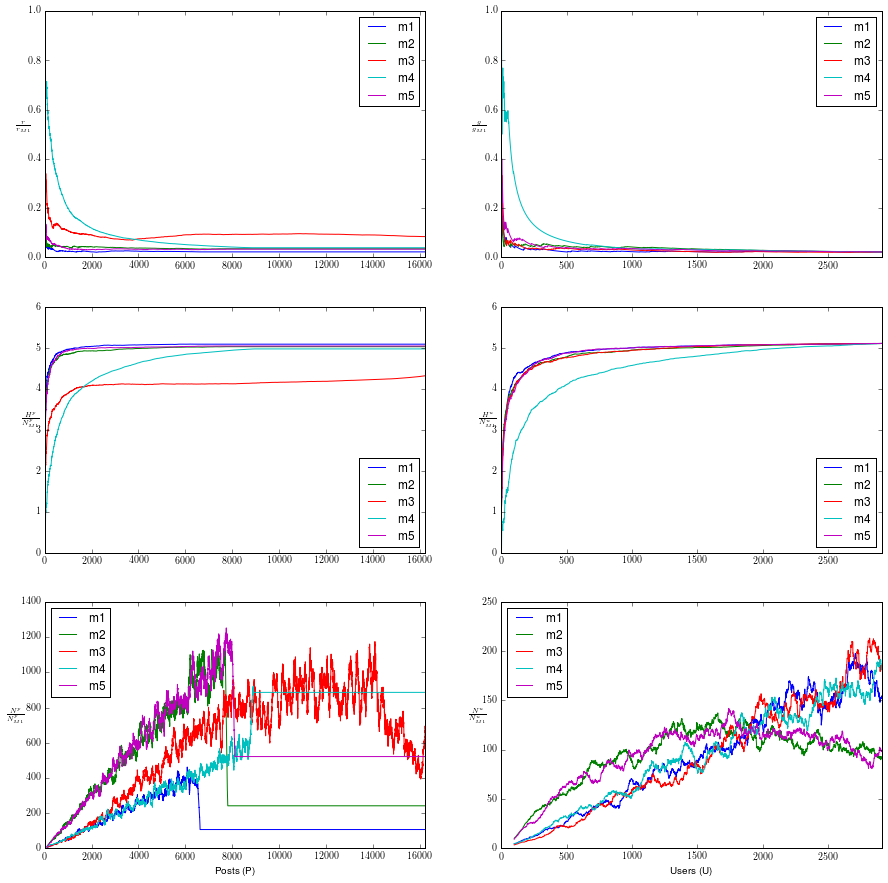

In [24]:

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))
plt.rcParams['text.usetex'] = True

# result_user = dfu
# result_act = dfa
def ratio(n, w):
    if n == 0:
        return 0
    
    if w == 0:
        return 0
    
    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"]),
        "m5":ratio(data["m5"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance_m1","usagedominance_m2","usagedominance_m3","usagedominance_m4","usagedominance"]]
usagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']

plt = usagedominance.plot(ax=axes[0,0])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance_m1","userusagedominance_m2","userusagedominance_m3","userusagedominance_m4","userusagedominance"]]
userusagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']

plt = userusagedominance.plot(ax=axes[0,1])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy_m1","usageEntorpy_m2","usageEntorpy_m3","usageEntorpy_m4","usageEntorpy"]]
usageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']

plt = usageEntorpy.plot(ax=axes[1,0])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy_m1","userUsageEntorpy_m2","userUsageEntorpy_m3","userUsageEntorpy_m4","userUsageEntorpy"]]
userUsageEntorpy.columns =  ['m1', 'm2', 'm3', 'm4', 'm5']

plt = userUsageEntorpy.plot(ax=axes[1,1])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure_m1","ActivateionExposure_m2","ActivateionExposure_m3","ActivateionExposure_m4","ActivateionExposure"]]
ActivateionExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
ActivateionExposure.loc[:, 'm1'] = pd.rolling_mean(ActivateionExposure['m1'], 100)
ActivateionExposure.loc[:, 'm2'] = pd.rolling_mean(ActivateionExposure['m2'], 100)
ActivateionExposure.loc[:, 'm3'] = pd.rolling_mean(ActivateionExposure['m3'], 100)
ActivateionExposure.loc[:, 'm4'] = pd.rolling_mean(ActivateionExposure['m4'], 100)
ActivateionExposure.loc[:, 'm5'] = pd.rolling_mean(ActivateionExposure['m5'], 100)

plt = ActivateionExposure.plot(ax=axes[2,0])
plt.set_xlabel('Posts (P)')
plt.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure_m1","UserExposure_m2","UserExposure_m3","UserExposure_m4","UserExposure"]]
UserExposure.columns =  ['m1', 'm2', 'm3', 'm4', 'm5']
UserExposure.loc[:, 'm1'] = pd.rolling_mean(UserExposure['m1'], 100)
UserExposure.loc[:, 'm2'] = pd.rolling_mean(UserExposure['m2'], 100)
UserExposure.loc[:, 'm3'] = pd.rolling_mean(UserExposure['m3'], 100)
UserExposure.loc[:, 'm4'] = pd.rolling_mean(UserExposure['m4'], 100)
UserExposure.loc[:, 'm5'] = pd.rolling_mean(UserExposure['m5'], 100)

plt = UserExposure.plot(ax=axes[2,1])
plt.set_xlabel('Users (U)')
plt.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)

In [25]:
def ratio(n, w):
    if n == 0:
        return 0
    
    if w == 0:
        return 0
    
    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"]),
        "m5":ratio(data["m5"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance_m1","usagedominance_m2","usagedominance_m3","usagedominance_m4","usagedominance"]]
usagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
usagedominance = usagedominance.apply(rowRatio,1)

plt = usagedominance.plot(ax=axes[0,0])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance_m1","userusagedominance_m2","userusagedominance_m3","userusagedominance_m4","usagedominance"]]
userusagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
userusagedominance = userusagedominance.apply(rowRatio,1)

plt = userusagedominance.plot(ax=axes[0,1])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy_m1","usageEntorpy_m2","usageEntorpy_m3","usageEntorpy_m4","usagedominance"]]
usageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
usageEntorpy = usageEntorpy.apply(rowRatio,1)

plt = usageEntorpy.plot(ax=axes[1,0], ylim=(0,1.5))
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy_m1","userUsageEntorpy_m2","userUsageEntorpy_m3","userUsageEntorpy_m4","usagedominance"]]
userUsageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plt = userUsageEntorpy.plot(ax=axes[1,1])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure_m1","ActivateionExposure_m2","ActivateionExposure_m3","ActivateionExposure_m4","usagedominance"]]
ActivateionExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
ActivateionExposure['m1'] = pd.rolling_mean(ActivateionExposure['m1'], 100)
ActivateionExposure['m2'] = pd.rolling_mean(ActivateionExposure['m2'], 100)
ActivateionExposure['m3'] = pd.rolling_mean(ActivateionExposure['m3'], 100)
ActivateionExposure['m4'] = pd.rolling_mean(ActivateionExposure['m4'], 100)
ActivateionExposure['m5'] = pd.rolling_mean(ActivateionExposure['m5'], 100)
ActivateionExposure = ActivateionExposure.apply(rowRatio,1)

plt = ActivateionExposure.plot(ax=axes[2,0])
plt.set_xlabel('Posts (P)')
plt.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure_m1","UserExposure_m2","UserExposure_m3","UserExposure_m4","usagedominance"]]
UserExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
UserExposure['m1'] = pd.rolling_mean(UserExposure['m1'], 100)
UserExposure['m2'] = pd.rolling_mean(UserExposure['m2'], 100)
UserExposure['m3'] = pd.rolling_mean(UserExposure['m3'], 100)
UserExposure['m4'] = pd.rolling_mean(UserExposure['m4'], 100)
UserExposure['m5'] = pd.rolling_mean(UserExposure['m5'], 100)
UserExposure = UserExposure.apply(rowRatio,1)

plt = UserExposure.plot(ax=axes[2,1])
plt.set_xlabel('Users (U)')
plt.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)

/Users/danielkershaw/Virtualenvs/iPython/lib/python3.5/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielkershaw/Virtualenvs/iPython/lib/python3.5/site-packages/ipykernel/__main__.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielkershaw/Virtualenvs/iPython/lib/python3.5/site-packages/ipykernel/__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d